###  Name: Shriya Bhat
### Reg: 220968020
### Class: DSE A1
### Week 4 q1

In [1]:
!pip install tsplib95

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### WEEK 4:  
### Question 1 


In [ ]:
Solving the Symmetric Traveling Salesman Problem (sTSP) Using Variants of Hill Climbing 
Algorithms 
Objective 
The objective of this study is to analyze, implement, and compare multiple Hill Climbing 
algorithms for solving the Symmetric Traveling Salesman Problem (sTSP). The sTSP requires 
finding the shortest possible route that visits each city exactly once and returns to the starting 
point, with symmetric distances between cities. 
This research aims to evaluate the strengths and weaknesses of different Hill Climbing 
strategies in optimizing tour length, computational efficiency, and convergence behavior. 
Specifically, we will examine: 
• Simple Hill Climbing 
• Stochastic Hill Climbing 
• Steepest Ascent Hill Climbing 
By conducting experiments on benchmark datasets, we will assess the effectiveness of each 
algorithm and provide insights into their suitability for solving the sTSP. 
Scope of Work 
1. Data Processing 
o Parse and preprocess TSP datasets from TSPLIB95. 
o Extract city coordinates and compute the corresponding distance matrix. 
2. Algorithm Implementation 
o Implement Simple Hill Climbing, Stochastic Hill Climbing, and Steepest 
Ascent Hill Climbing for solving TSP. 
o Ensure efficient solution representation and neighborhood search strategies. 
3. Experimental Evaluation 
 

In [4]:
conda update numpy scipy


Solving environment: ...working... 

Updating numpy is constricted by 

anaconda -> requires numpy==1.21.5=py39h7a0a035_1

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`



Updating scipy is constricted by 

anaconda -> requires scipy==1.7.3=py39h0a974cb_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - numpy
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-pack-0.7.1           |   py39haa95532_0          73 KB
    pyjwt-2.10.1               |   py39haa95532_0          77 KB
    ---------------------------------



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [1]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mca\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Check the permissions.



Solving the Symmetric Traveling Salesman Problem (sTSP) Using Hill Climbing Algorithms


In [3]:
import numpy as np
import scipy.spatial.distance as dist
import gzip
import matplotlib.pyplot as plt
from colorama import Fore, Style
from prettytable import PrettyTable


In [4]:
# 1. Data Processing: Parsing TSP Data and Computing Distance Matrix
def read_tsp_data(file_path):
    with gzip.open(file_path, 'rt') as file:
        lines = file.readlines()

    cities = []
    coordinates = []

    for line in lines:
        if line.startswith("DIMENSION"):
            num_cities = int(line.split(":")[1])
            break

    for line in lines[6:6 + num_cities]:
        city_data = line.strip().split()
        cities.append(city_data[0])
        coordinates.append([float(x) for x in city_data[1:]])

    return cities, np.array(coordinates)

def compute_distance_matrix(coordinates):
    return dist.squareform(dist.pdist(coordinates))

# 2. Algorithm Implementations: Hill Climbing Variants
def tsp_objective_function(order, distance_matrix):
    rotated_order = np.roll(order, -1)
    return np.sum(distance_matrix[order, rotated_order])

def hill_climbing_iteration(current_solution, distance_matrix):
    idx1, idx2 = np.random.choice(len(current_solution), size=2, replace=False)
    neighbor_solution = current_solution.copy()
    neighbor_solution[idx1], neighbor_solution[idx2] = neighbor_solution[idx2], neighbor_solution[idx1]

    neighbor_distance = tsp_objective_function(neighbor_solution, distance_matrix)
    return neighbor_solution, neighbor_distance

# Simple Hill Climbing Algorithm
def hill_climbing(initial_solution, distance_matrix, num_iterations=1000):
    current_solution = initial_solution.copy()
    current_distance = tsp_objective_function(current_solution, distance_matrix)

    for _ in range(num_iterations):
        neighbor_solution, neighbor_distance = hill_climbing_iteration(current_solution, distance_matrix)

        if neighbor_distance < current_distance:
            current_solution, current_distance = neighbor_solution, neighbor_distance

    return current_solution, current_distance

# Stochastic Hill Climbing Algorithm
def stochastic_hill_climbing(initial_solution, distance_matrix):
    current_solution = initial_solution
    current_distance = tsp_objective_function(current_solution, distance_matrix)

    while True:
        neighbor_solution, neighbor_distance = hill_climbing_iteration(current_solution, distance_matrix)

        if neighbor_distance < current_distance:
            current_solution, current_distance = neighbor_solution, neighbor_distance
        else:
            break

    return current_solution, current_distance

# Steepest Ascent Hill Climbing Algorithm
def steepest_ascent_hill_climbing(initial_solution, distance_matrix, num_iterations=1000):
    current_solution = initial_solution.copy()
    current_distance = tsp_objective_function(current_solution, distance_matrix)

    for _ in range(num_iterations):
        best_neighbor_solution = current_solution.copy()
        best_neighbor_distance = current_distance

        # Generate all neighbors and choose the best one
        for i in range(len(current_solution)):
            for j in range(i + 1, len(current_solution)):
                neighbor_solution = current_solution.copy()
                neighbor_solution[i], neighbor_solution[j] = neighbor_solution[j], neighbor_solution[i]

                neighbor_distance = tsp_objective_function(neighbor_solution, distance_matrix)

                if neighbor_distance < best_neighbor_distance:
                    best_neighbor_solution = neighbor_solution
                    best_neighbor_distance = neighbor_distance

        if best_neighbor_distance < current_distance:
            current_solution, current_distance = best_neighbor_solution, best_neighbor_distance
        else:
            break

    return current_solution, current_distance

# 3. Visualizing the Paths
def plot_path(ax, coordinates, order, title):
    ordered_coordinates = coordinates[order]
    ax.plot(ordered_coordinates[:, 0], ordered_coordinates[:, 1], 'o-', mfc='r')
    ax.set_title(title)

# 4. Main Execution Loop: Running Algorithms on Multiple Datasets
def run_experiment(file_paths):
    # Store the results for all datasets
    all_results = {}

    for file_path in file_paths:
        print(f"Processing dataset: {file_path}")
        cities, coordinates = read_tsp_data(file_path)
        distance_matrix = compute_distance_matrix(coordinates)

        np.random.seed(69)

        # Apply the local search algorithms
        algorithms = [hill_climbing, stochastic_hill_climbing, steepest_ascent_hill_climbing]
        algorithm_names = ['Simple Hill Climbing', 'Stochastic Hill Climbing', 'Steepest Ascent Hill Climbing']

        # Initialize a list to store all outcomes
        all_outcomes = []

        for algorithm, name in zip(algorithms, algorithm_names):
            initial_solution = np.random.permutation(len(cities))
            solution, distance = algorithm(initial_solution, distance_matrix)
            all_outcomes.append((name, solution, distance))

            # Print the solution for each algorithm
            print(f"{name} Solution: {solution}")
            print("")

        # Select the best outcome
        best_outcome = min(all_outcomes, key=lambda x: x[2])

        # Tabulate the results
        table = PrettyTable()
        table.field_names = ["Algorithm", "Distance"]
        for name, _, distance in all_outcomes:
            if (name, _, distance) == best_outcome:
                table.add_row([Fore.GREEN + name + Style.RESET_ALL, distance])
            else:
                table.add_row([name, distance])

        all_results[file_path] = table.get_string()

        # Plot the paths
        fig, axs = plt.subplots(1, len(algorithms), figsize=(20, 7))
        for i, (name, solution, distance) in enumerate(all_outcomes):
            plot_path(axs[i], coordinates, solution, f'{name}\nMinimum Distance: {distance:.2f}')
        plt.show()

    return all_results




Processing dataset: ./TSPLIB95/rd100.tsp.gz
Simple Hill Climbing Solution: [65 97 30 40 60 10 91 16 45 49 53 32 31 13 84  0 89 95 88 75 52 56 93 51
 63 39 38 28 15 43 44 34  1 22 76 87 83  5 26 72 55 36 27 57  6 99 77  9
  8 11 14 86 17 59 12 62 66 19  2 47 80 29 92 18 48 61 67 70  7 50  4 21
 41 23 35 85 46 20 68 42 24 79 64 82 74 98 78 25 71 69 37 54 33 90 96 81
  3 73 58 94]

Stochastic Hill Climbing Solution: [41 79 48 89 42 10 49 76 16 82 68 12 59 61 47  3 33 55 86 17 97  2 23 75
 19 83 28 43 14 60 66  9 25 13  6 90 45 20 67 22 91 52 26 32 84 94 24  7
 80 34  8 73 74  4 15 18 72  1 30 71 56 36 96 70 57 21 54 64 65 69 37 50
 78 77 11 46 85 92 81 62 63 95 29 39 35 99 38 27 87 93 31 53 88  5 44 98
  0 40 58 51]

Steepest Ascent Hill Climbing Solution: [33  6 60  4 40 21 29 47 89 96 85 20 25 16 71 69  8 11 84 13 86 70 67 82
 50 98 27 36 18 55  2 62 14 59  7 68 63 35 99 43 28 34 22  1 88 57 75  9
 32 78 93 97 94 58 76 92 65 87 83 30 44 15 46 52  5 72 53 37 73 19 31 81
  3 26 45 49 91 7

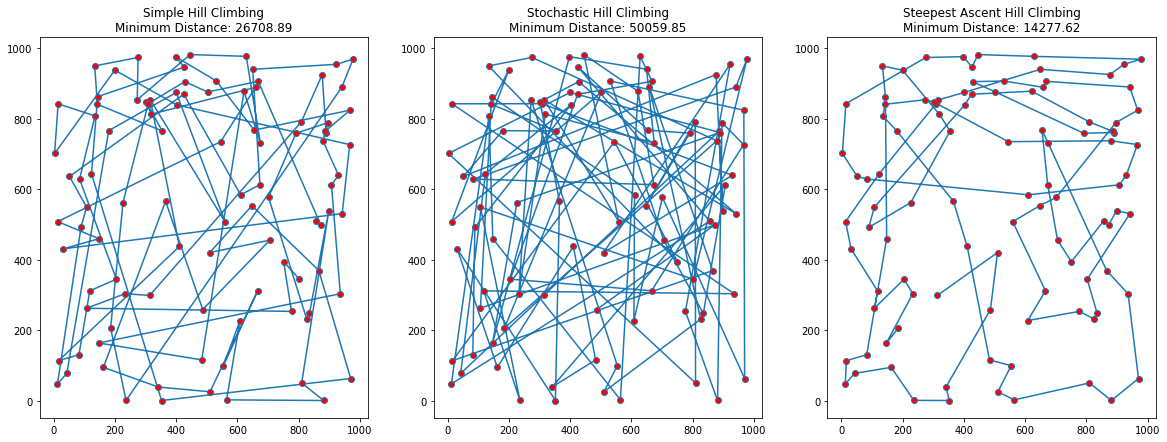

Processing dataset: ./TSPLIB95/eil101.tsp.gz
Simple Hill Climbing Solution: [ 46  48   9   8  33  34  88  98  83  16   4  92  36  85  43  90  60   7
  51  47  62  19  52   1  96  82  10  45  35  44  13  91  86  40  39  55
  20  93  94  95   5  30  68  50  65  70  64  32  78  77   2  29  87  18
  69  49  76   0  17  97  99  15  84  59  63  31  89  61  58  37  42  14
  21  27  79  67  28  25  81   6  80  24  23  22  66  38   3  57  12  41
 100  56  74  71  73  72  53  54  11  75  26]

Stochastic Hill Climbing Solution: [ 88  83  34  74  63  47   3  17  59  84  94  70  77  11   9  93  68  69
   0  28  75  62  72  42  39  49  26  92  61  81  66  21  14  90  99  79
  10  22  44  37  33   4  53  50  87  97  25  40  35   5  54  12 100  51
  38   1  32  29  64  95   6  86  13  91  18  89  23  52  56  15  96  57
  20  19  43  80  24  67  78  73  76  55  65  71  46  30   2  58  45  85
  27  41  98  48  36  31  82   8  60  16   7]

Steepest Ascent Hill Climbing Solution: [ 86   1  25  11  67  79 

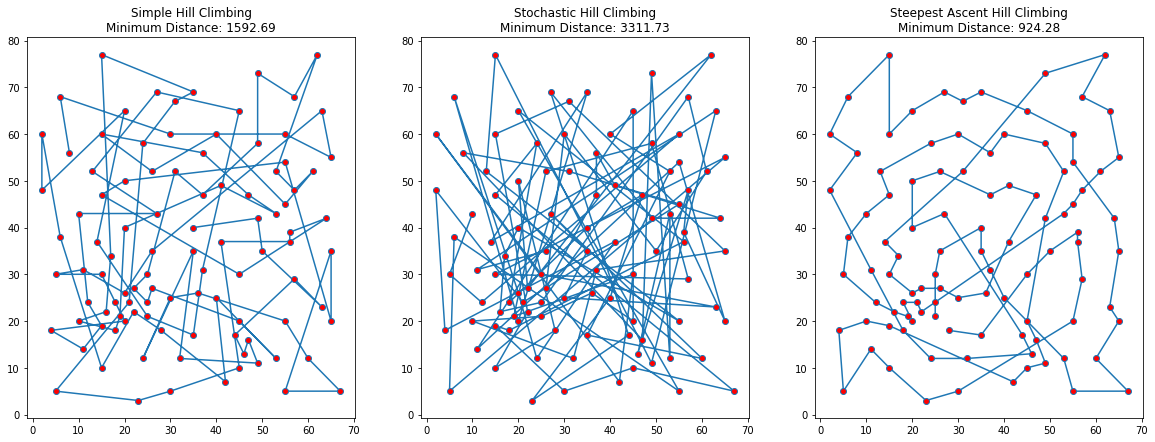

Processing dataset: ./TSPLIB95/a280.tsp.gz
Simple Hill Climbing Solution: [ 36  46 124 154 156 181 198 254 238 233 146 147   2   3 130 119  30 249
 255 162  89 138 205 201 148 271 267 236 228 234 241 172  73 150 141 142
 140 135 257 209 105  79  99 165 125  25 129 100 102 106  59  32  31  38
  50 212 194 134 211 216 221 191  90  64 114 107 190 161 144 184 173 118
 187   6 248 240 218 214 213 225 245  57  58 128  21  24  87 104 183 164
 235 220 151 149  23 131 126 250   4   1 244 239 246  61 117  62  51 120
  45  49  70  83 159  28 277 207 252 231 208 260  11  14 273  33  43 111
  86 109 167 155 202 210 139 177  76  84  65  34 229 247 259 272 219 178
 227 256 186 163  93  74  39  44  48 122 230  15  12 206 193 179  98  78
 108 175 222 223 266 263 215 197 170  91 166 192 145 103  95 110  80  81
  37  55  72  17 203   7   5   8  26 137 152 115  68  88 169 116 123 242
 253 264  85  82  71 127  22 262 268 153  42 101  96 168 275   0 276 185
 157 188  94  35  41  20  47  27 224 232 217 204 2

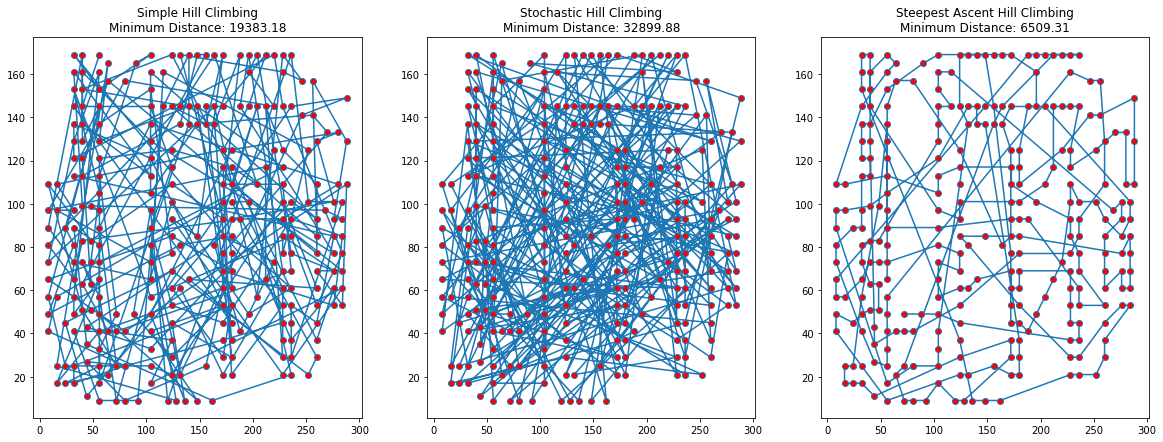

Processing dataset: ./TSPLIB95/d198.tsp.gz
Simple Hill Climbing Solution: [ 31  22 166 170 164 185 195 150  73   9  10  82  32  92  23  37  13   0
   6  52 116 151 141 165 157 182 197 186 100  26 177 193 121 117  51  21
  20 161 163 134 143 159 111  97   7   8  67  68  69  59 191 188 181 171
 158 104 110  25  78  79  46  98  57  58  54  42  70  12  88 138 128 127
 187 189 154 152 145 176  34  75 105  45  17  28  33  19  14  39  64  89
  87  90 101 103  76  61   3   1  55 119  48 118 124 139 120 136 172 173
 174 180 147 160  86  72  65  66  41  30  93 168 102  81   4   5   2  18
 113 122 115 144 132 125 109 153 190 175 179 178 194 167 126  29  27  56
  53  85 106 183 184 137 133  94  95  96  80 169 129  83  40  84  71  43
  11  24  36 148 149 192 196  16  15  91 114 155 162 142 123  50  63  74
  99  60 156 112 146 140 131 130 135  44  47  62  49  77  38 108 107  35]

Stochastic Hill Climbing Solution: [ 46 157  77  90  62 119 154  61  55 186  21  51  34 114   0 125 106 109
  13  65 173 

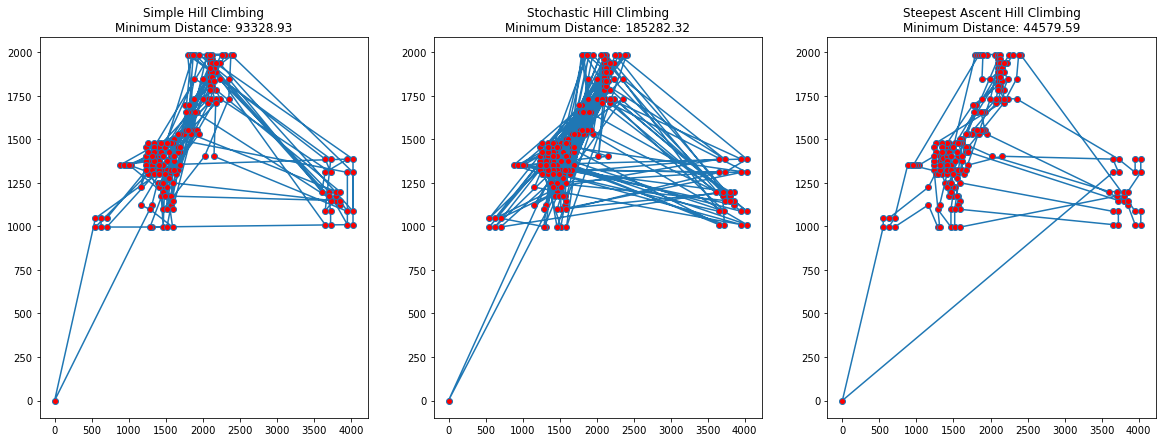

Processing dataset: ./TSPLIB95/ch150.tsp.gz
Simple Hill Climbing Solution: [ 55  32  20 114  61  33  72  59 129  35 119  11 146  58 104 120   9 145
  91 133 112 148  21  43  73   5  28 143  30  68 116  41  60 127 118  67
 124  66  48 149  70  63  78  90  23  24  54  74  84 136  57   1 130  37
  22 117  19 137  99 106  93 139  65   8  49  98 113  25  81 135 122 138
  52 126  16  13  87  29  47  62  53  89  17   7  92 142  42  40 100  38
 128  26  88  75 102  97 110  77 144  71 131 101  18  36  82 123  83   6
  51  14 132  76  39  31 103 105 111  50  45 107  85 134 141 125  86  94
   4   3  44  12  79 121  15 140 109  80  27  46  34  95   2   0  96  64
  69 108 115  56  10 147]

Stochastic Hill Climbing Solution: [ 26  48   0  89  72 110  88   7 130  38   4  99  25 108 143 139  70  29
 147  55  44  76 135 138 100  91  79  41  59  13  94 141 122  18 113 142
  54  71 116  74  31 103 112  93 140 104  42  34   9 149  98  52  45  21
  75  19 107  65  62 126 144 124  84  66 117  23 118  85 133

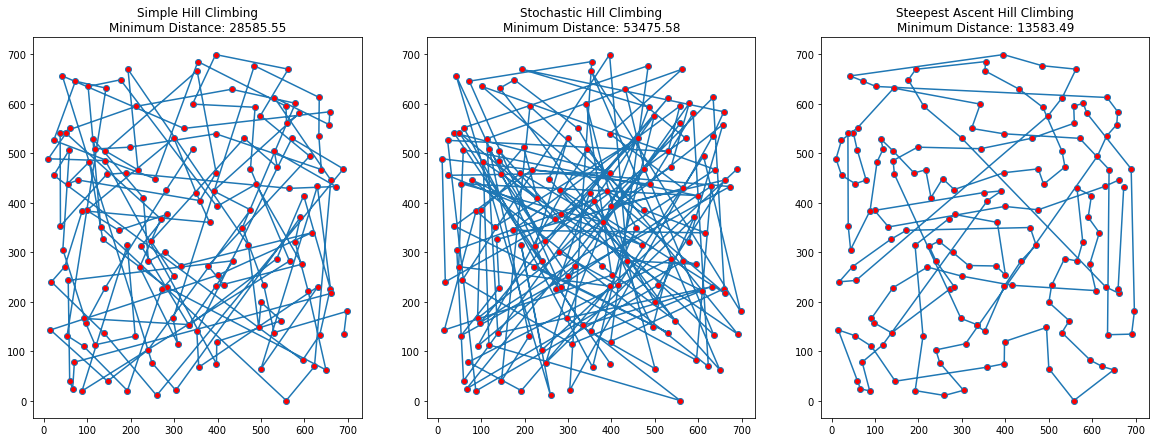

Results for ./TSPLIB95/rd100.tsp.gz:

+-------------------------------+--------------------+
|           Algorithm           |      Distance      |
+-------------------------------+--------------------+
|      Simple Hill Climbing     | 26708.88632072875  |
|    Stochastic Hill Climbing   | 50059.85425301339  |
| Steepest Ascent Hill Climbing | 14277.615507462475 |
+-------------------------------+--------------------+

--------------------------------------------------

Results for ./TSPLIB95/eil101.tsp.gz:

+-------------------------------+--------------------+
|           Algorithm           |      Distance      |
+-------------------------------+--------------------+
|      Simple Hill Climbing     | 1592.6885684379524 |
|    Stochastic Hill Climbing   | 3311.7308406207353 |
| Steepest Ascent Hill Climbing | 924.2838569096044  |
+-------------------------------+--------------------+

--------------------------------------------------

Results for ./TSPLIB95/a280.tsp.gz:

+---------

In [5]:
# 5. Run the experiment on all datasets
file_paths = [
    './TSPLIB95/rd100.tsp.gz',
    './TSPLIB95/eil101.tsp.gz',
    './TSPLIB95/a280.tsp.gz',
    './TSPLIB95/d198.tsp.gz',
    './TSPLIB95/ch150.tsp.gz'
]

# Execute the experiment
results = run_experiment(file_paths)

# Display results for each dataset
for file_path, result in results.items():
    print(f"Results for {file_path}:\n")
    print(result)
    print("\n" + "-"*50 + "\n")

In [ ]:
o Compare performance based on: 
▪ Solution quality (total tour distance) 
▪ Convergence behavior (iterations to reach a solution) 
▪ Computational time 


In [ ]:
4. Comparative Analysis & Insights 
o Identify which algorithm produces the best results for different datasets. 
o Analyze trade-offs between solution quality and runtime. 
o Discuss algorithmic limitations and potential improvements. 


In [ ]:
Deliverables 
1. Implementation Code 
• Python scripts for parsing TSP datasets and computing distance matrices. 
• Implementations of all selected Hill Climbing algorithms. 
• Execution of the algorithms on benchmark datasets. 
2. Experimental Results 
• A comparative table summarizing the tour cost (total distance) for each algorithm and 
dataset. 
• Visualizations (e.g., tour plots, convergence graphs) for performance evaluation. 
• Observations on solution quality, convergence, and computational efficiency. 
3. Research Report 
• Explanation of methodology and algorithmic strategies. 
• Comparative analysis of the algorithms, including best/worst-performing cases.